In [5]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X,y = make_moons(n_samples=1000,noise=0.15)
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)


In [3]:
#Make it a dataframe
import pandas as pd
df = pd.DataFrame(X)
df[2]=y
df.columns = ['Zero','One','Target']
df.head()

,Zero,One,Target
0,-0.013834,0.179452,1
1,1.876976,0.104424,1
2,1.288490,-0.439912,1
3,-0.065605,0.985299,0
4,0.722865,0.293195,0


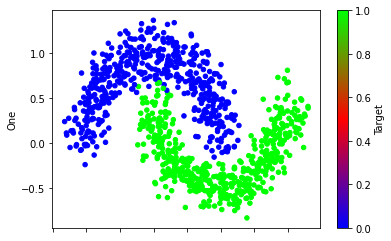

In [4]:
df.plot.scatter(x='Zero',y='One',c = 'Target',colormap='brg')

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, max_samples = 50,
     bootstrap=True,n_jobs= -1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=50,
                  n_estimators=500, n_jobs=-1)

In [14]:
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.944


In [15]:
#Easier way of doing the evaluation
print(bag_clf.score(X_test,y_test))

0.944


In [16]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [17]:
print(rnd_clf.score(X_test,y_test))

0.992
